# ANND - Proplem Set 1
## Ammar Ibrahim & Mohammad Orabe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Read spike times
spike_trains = [] # a list of 3 elements, each element is an array of spike times.
for i in range(1,4):
    spike_trains.append(np.loadtxt('ExampleSpikeTimes{}.dat'.format(i), delimiter = ';')/1000)

In [3]:
# Define necesarry variables
duration_T = [4,10]
delta_t = 0.1/1000

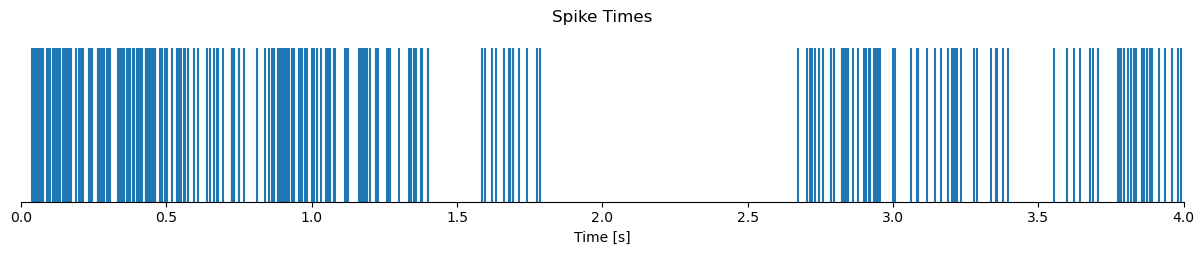

In [4]:
def plot_trains(train, duration):
    # plots the spike train.
    fig, ax = plt.subplots(figsize=(15,2))
    ax.set_ylim((0,1))
    ax.set_xlim((0, duration))
    ax.spines[['right', 'top', 'left']].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.eventplot(train, lineoffsets=0.5,)
    ax.set_title('Spike Times\n')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Spikes')
    plt.show()

plot_trains(spike_trains[0], duration= duration_T[0]) 

In [5]:
def plot_hist(train, bin_width, duration = duration_T):
    
    plt.figure(figsize=(15,5))
    
    for i in range(3):
        num_bins = math.ceil(duration/(bin_width[i]))
        plt.hist(train,range=(0,duration),bins= num_bins, weights = [1/bin_width[i]]* len(train),
                   histtype='step', label=f'bin_width={bin_width[i]}s')
   
    plt.title('Firing rate')
    plt.ylabel('Spikes/s')
    plt.xlabel('Time [s]')
    
    plt.legend()
    plt.show()

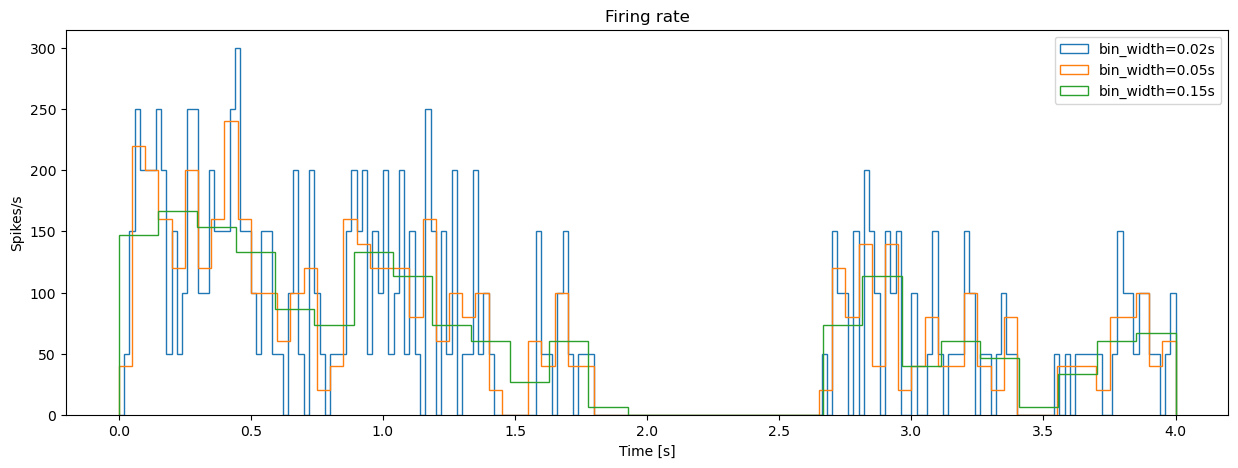

In [6]:
plot_hist(spike_trains[0], [0.02, 0.05, 0.15] ,duration_T[0])

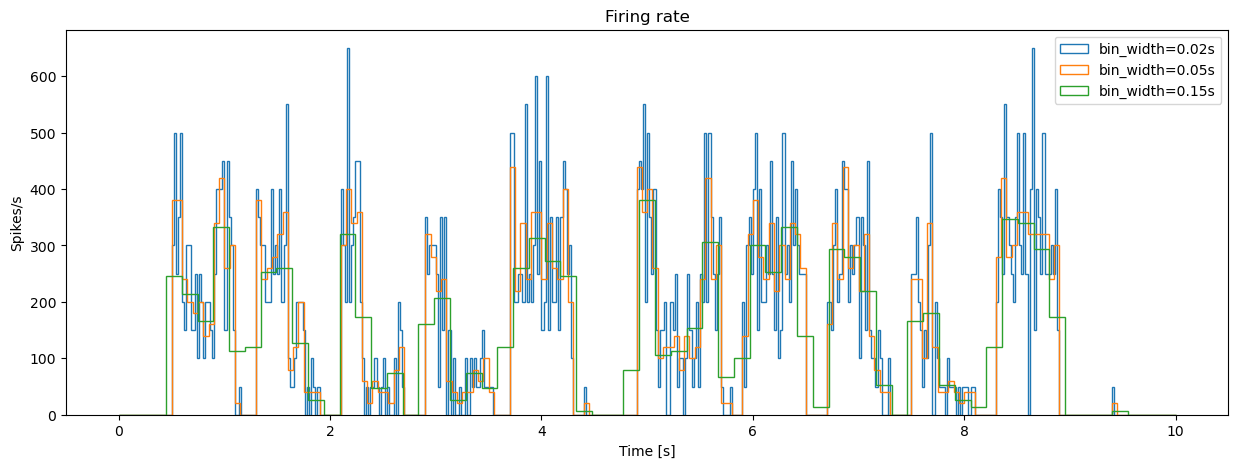

In [7]:
plot_hist(spike_trains[1], [0.02, 0.05, 0.15],duration_T[1])

In [8]:
def get_firing_rate(train, duration, time_res, filter):
    firing_rate = [] # value of firing rate at each time step.
    for t in np.arange(0, duration,time_res): # for each time step
        summation = 0
        for spike in train: 
            summation += filter(t-spike) # center a kernel at each spike, and sum the kernels to get firing rate at that time step
        firing_rate.append(summation)
    
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(0, duration,time_res),firing_rate)

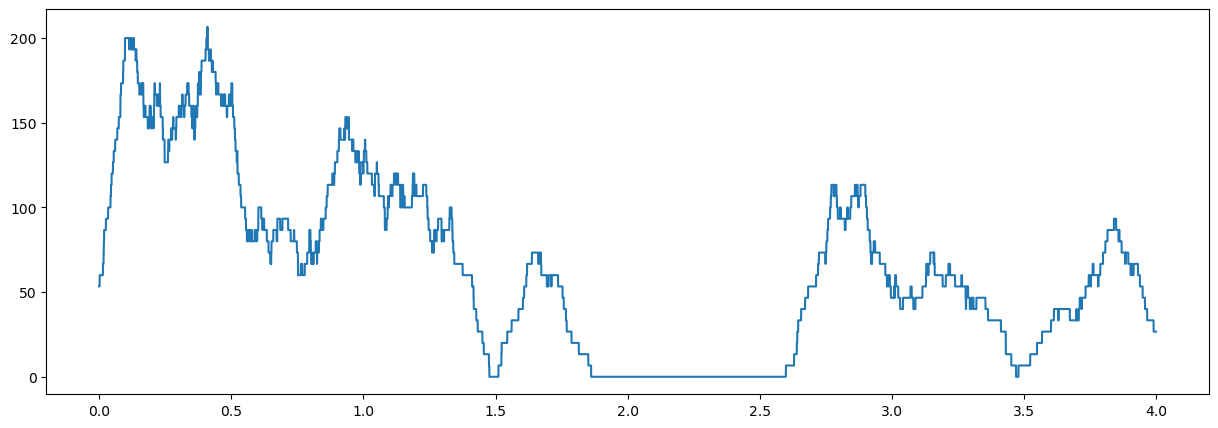

In [9]:
filter_width = 0.15
rec_window = lambda tau: 1/filter_width if ((tau>=-filter_width/2) and (tau<=filter_width/2)) else 0
get_firing_rate(spike_trains[0], duration_T[0], delta_t, rec_window)

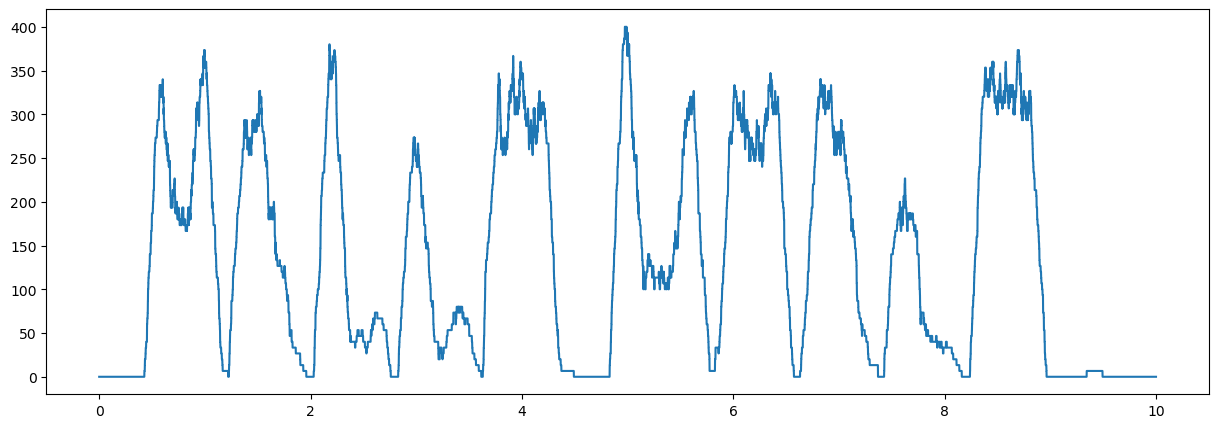

In [10]:
get_firing_rate(spike_trains[1], duration_T[1], delta_t, rec_window)


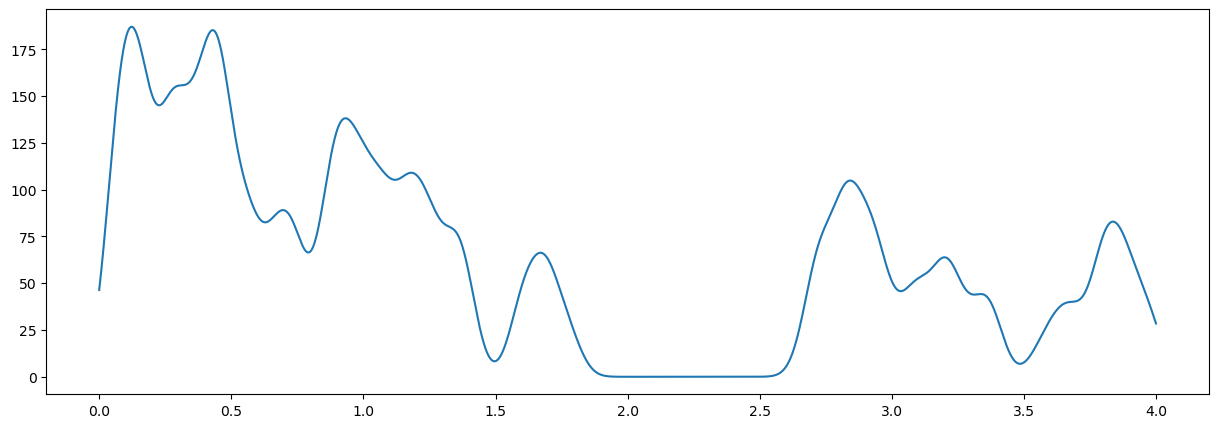

In [11]:
sigma = 0.05
gaussian_filter = lambda tau: np.exp(-1 * tau**2/(2* sigma**2)) / (np.sqrt(2* np.pi)*sigma)
get_firing_rate(spike_trains[0], duration_T[0], delta_t, gaussian_filter)

In [12]:
# ===============================
# # Reading the spike trains from the second fil might take too long to run.
# ===============================

# sigma = 0.05
# gaussian_filter = lambda tau: np.exp(-1 * tau**2/(2* sigma**2)) / (np.sqrt(2* np.pi)*sigma)
# get_firing_rate(spike_trains[1], duration_T[1], delta_t, gaussian_filter)

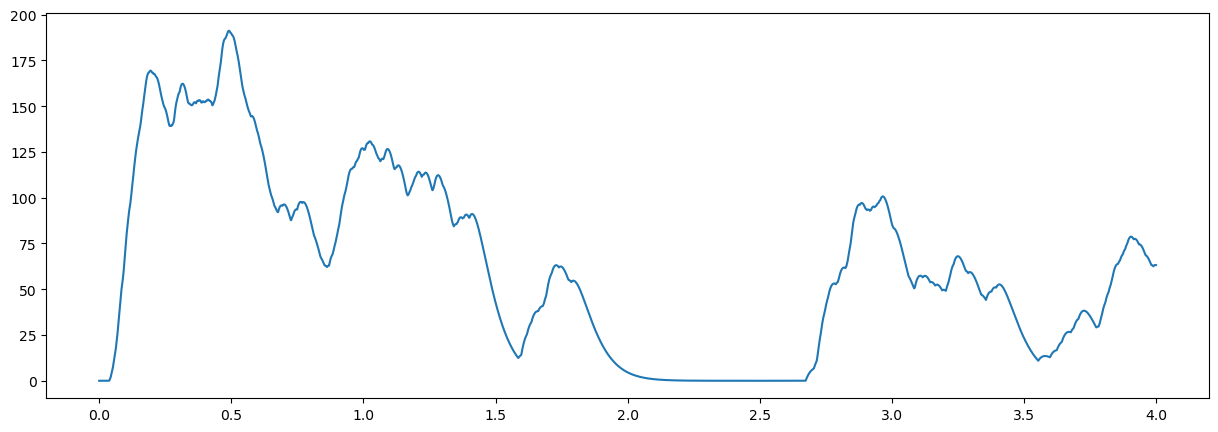

In [13]:
alpha = 1/0.05
alpha_filter = lambda tau: alpha*alpha * tau * np.exp(-alpha * tau) if ((alpha*alpha * tau * np.exp(-alpha * tau)) >=0) else 0
get_firing_rate(spike_trains[0], duration_T[0], delta_t, alpha_filter)

In [14]:
# ===============================
# Reading the spike trains from the second fil might take too long to run.
# ===============================

# get_firing_rate(spike_trains[1], duration_T[1], delta_t, alpha_filter)

## [ADDITIONAL] Implementation using convolution

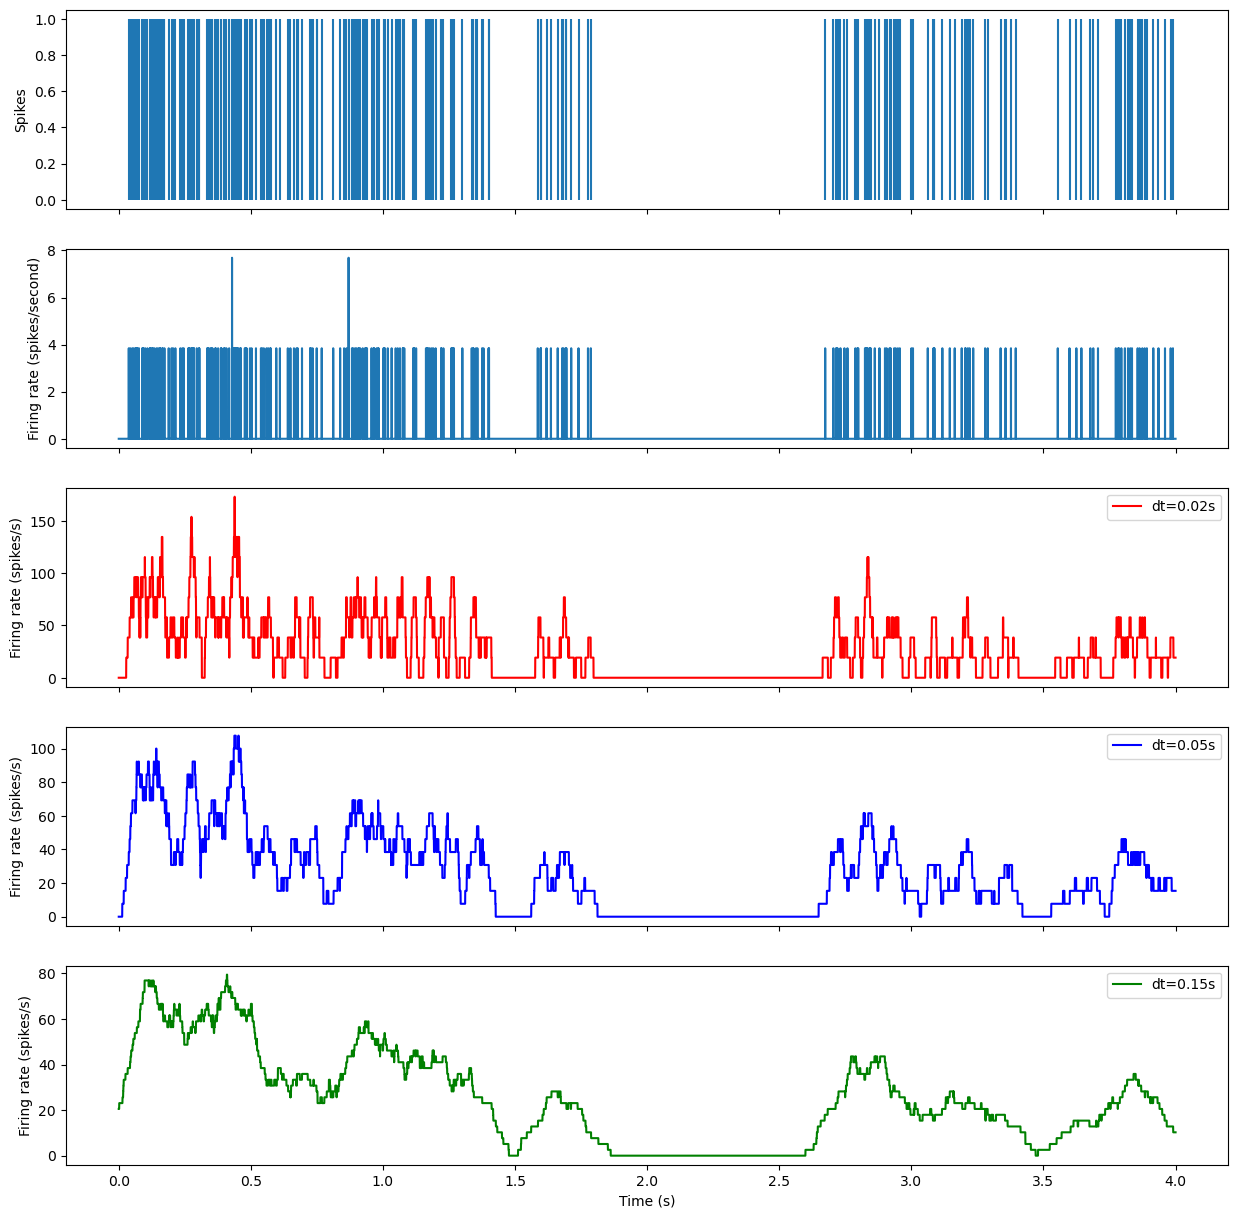

In [15]:
# Read spike times
spike_times = np.loadtxt(fname='ExampleSpikeTimes1.dat') # [ms]
spike_times = spike_times / 1000.0 # [ms]

T = 4.0 # [s]
dt = 0.0001 # [s]
t = np.arange(0, T, dt)

dt_20ms = 0.02
dt_50ms = 0.05
dt_150ms = 0.15

# Convert spike times to spike counts
spike_counts, _ = np.histogram(spike_times, bins=np.arange(0, T + dt, dt))

window_20ms = np.ones(int(dt_20ms * 10000)) / dt_20ms
window_50ms = np.ones(int(dt_50ms * 10000)) / dt_50ms
window_150ms = np.ones(int(dt_150ms * 10000)) / dt_150ms

rate_20ms = np.convolve(spike_counts, window_20ms, mode="same") / len(spike_times) * 100
rate_50ms = np.convolve(spike_counts, window_50ms, mode="same") / len(spike_times) * 100
rate_150ms = np.convolve(spike_counts, window_150ms, mode="same") / len(spike_times) * 100

# ==================================
# Plot spike counts and firing rates
# ==================================

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(15, 15))

ax[0].vlines(spike_times, ymin=0, ymax=1)
ax[0].set_ylabel("Spikes")

ax[1].plot(t, spike_counts / len(spike_times) * 1000)
ax[1].set_ylabel("Firing rate (spikes/second)")

# all plots in one panel
# ax[2].plot(t, rate_20ms, label=f"dt={dt_20ms}s")
# ax[2].plot(t, rate_50ms, label=f"dt={dt_50ms}s")
# ax[2].plot(t, rate_150ms, label=f"dt={dt_150ms}s")

ax[2].plot(t, rate_20ms, c='r', label = f"dt={dt_20ms}s")
ax[3].plot(t, rate_50ms, c='b', label = f"dt={dt_50ms}s")
ax[4].plot(t, rate_150ms, c='g', label = f"dt={dt_150ms}s")

ax[4].set_xlabel("Time (s)")

ax[2].set_ylabel("Firing rate (spikes/s)")
ax[3].set_ylabel("Firing rate (spikes/s)")
ax[4].set_ylabel("Firing rate (spikes/s)")

ax[2].legend(loc="upper right")
ax[3].legend(loc="upper right")
ax[4].legend(loc="upper right")

plt.legend()
plt.show()